In [1]:
from google.colab import drive    #Mounting drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/IR PROJECT'   # locating data directory(path)

In [3]:
import time
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
!pip install pylanguagetool

# !pip install catboost
# from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
data = pd.read_csv(f"{data_dir}/fake reviews dataset_IR.csv")   
data # reading from csv file

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
4051,Home_and_Kitchen_5,5,OR,I bought this vacuum cleaner 3 months ago and ...
4052,Home_and_Kitchen_5,5,CG,I have a whole set of containers and they look...
4053,Home_and_Kitchen_5,5,OR,I purchased this after a friend recommended it...
4054,Home_and_Kitchen_5,5,CG,"Well, I've been curious about this set and am ..."


In [7]:
data['label'].value_counts()

CG    2028
OR    2028
Name: label, dtype: int64

In [8]:
data['text_'] = data['text_'].str.replace('\n', ' ')#strip out the \n newline character present and convert it to a space using str.replace().
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [9]:
data['label'].value_counts()

CG    2028
OR    2028
Name: label, dtype: int64

In [10]:
data['target'] = np.where(data['label']=='CG', 0, 1)
data.head()

,category,rating,label,text_,target
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0


In [11]:
data['target'].value_counts()

0    2028
1    2028
Name: target, dtype: int64

In [12]:
data.columns

Index(['category', 'rating', 'label', 'text_', 'target'], dtype='object')

In [13]:
import re

In [14]:
def punctuation_to_features(data, column):  
    
    data[column] = data[column].replace('!', ' exclamation ')
    data[column] = data[column].replace('?', ' question ')
    data[column] = data[column].replace('\'', ' quotation ')
    data[column] = data[column].replace('\"', ' quotation ')
    
    return data[column]
data['text_'] = punctuation_to_features(data, 'text_')

In [15]:
nltk.download('punkt');

def tokenize(column):
   
    
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
data['tokenized'] = data.apply(lambda x: tokenize(x['text_']), axis=1)
data.head()

,category,rating,label,text_,target,tokenized
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ..."
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had..."


In [17]:
def remove_stopwords(tokenized_column):
    
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]


In [18]:
nltk.download('stopwords')
data['stopwords_removed'] = data.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,category,rating,label,text_,target,tokenized,stopwords_removed
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee..."
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,..."


In [19]:
def apply_stemming(tokenized_column):
    
    stemmer = PorterStemmer() 
    return [stemmer.stem(word).lower() for word in tokenized_column]
data['porter_stemmed'] = data.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
data.head()

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,..."
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]"
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,..."


In [20]:
data['modified'] = [' '.join(wrd for wrd in x) for x in data['porter_stemmed']]
data.head()

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month


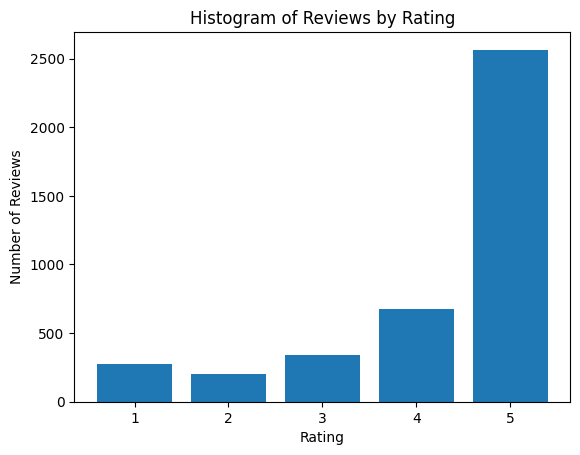

In [21]:

# group by rating and count number of reviews
ratings = data.groupby('rating')['modified'].count()

# create histogram
plt.bar(ratings.index, ratings.values)

# set labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Reviews by Rating')

# display plot
plt.show()

In [22]:
dfr = data.drop(index=data[(data['rating'] == 1) | (data['rating'] == 5)].index)
dfr.head()

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified
5,Home_and_Kitchen_5,3,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,0,"[I, WANTED, DIFFERENT, FLAVORS, BUT, THEY, ARE...","[I, WANTED, DIFFERENT, FLAVORS, BUT, THEY, ARE...","[i, want, differ, flavor, but, they, are, not]",i want differ flavor but they are not
7,Home_and_Kitchen_5,3,CG,These done fit well and look great. I love th...,0,"[These, done, fit, well, and, look, great, I, ...","[These, done, fit, well, look, great, I, love,...","[these, done, fit, well, look, great, i, love,...",these done fit well look great i love smooth e...
26,Home_and_Kitchen_5,2,CG,Not what I am accustomed to. The only reason I...,0,"[Not, what, I, am, accustomed, to, The, only, ...","[Not, I, accustomed, The, reason, I, gave, sta...","[not, i, accustom, the, reason, i, gave, star, i]",not i accustom the reason i gave star i
31,Home_and_Kitchen_5,3,CG,These are okay they are not as nice as the one...,0,"[These, are, okay, they, are, not, as, nice, a...","[These, okay, nice, ones, I, got, local, store]","[these, okay, nice, one, i, got, local, store]",these okay nice one i got local store
32,Home_and_Kitchen_5,3,CG,gave them away - thought it would be a good ad...,0,"[gave, them, away, thought, it, would, be, a, ...","[gave, away, thought, would, good, addition, k...","[gave, away, thought, would, good, addit, kitc...",gave away thought would good addit kitchen i


In [23]:
data['rating'].astype(int)

0       5
1       5
2       5
3       1
4       5
       ..
4051    5
4052    5
4053    5
4054    5
4055    5
Name: rating, Length: 4056, dtype: int64

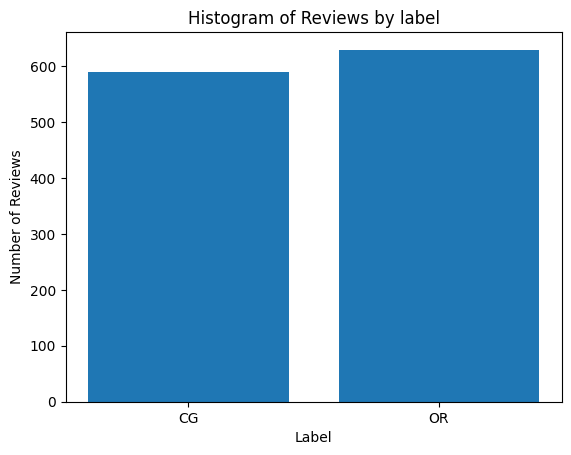

In [24]:

# group by rating and count number of reviews
labels = dfr.groupby('label')['modified'].count()

# create histogram
plt.bar(labels.index, labels.values)

# set labels and title
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Reviews by label')

# display plot
plt.show()

In [25]:

from textblob import TextBlob


# Define a function to calculate sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'review' column
data['sentiment'] = data['text_'].apply(get_sentiment)

# Define a function to label reviews as positive, negative, or neutral
def get_sentiment_label(sentiment):
    if sentiment > 0.5:
        return 'positive'
    elif sentiment < 0.5:
        return 'neutral'
    else:
        return 'negetive'

# Apply the sentiment label to the DataFrame
data['sentiment_label'] = data['sentiment'].apply(get_sentiment_label)

# Count the number of positive, negative, and neutral reviews
sentiment_counts = data['sentiment_label'].value_counts()

# Print the sentiment counts
print(sentiment_counts)




neutral     3374
positive     594
negetive      88
Name: sentiment_label, dtype: int64


In [26]:
data

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified,sentiment,sentiment_label
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti,0.473750,neutral
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year,0.558333,positive
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow,0.250000,neutral
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i,0.400000,neutral
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month,0.740000,positive
...,...,...,...,...,...,...,...,...,...,...,...
4051,Home_and_Kitchen_5,5,OR,I bought this vacuum cleaner 3 months ago and ...,1,"[I, bought, this, vacuum, cleaner, months, ago...","[I, bought, vacuum, cleaner, months, ago, abso...","[i, bought, vacuum, cleaner, month, ago, absol...",i bought vacuum cleaner month ago absolut love...,0.094367,neutral
4052,Home_and_Kitchen_5,5,CG,I have a whole set of containers and they look...,0,"[I, have, a, whole, set, of, containers, and, ...","[I, whole, set, containers, look, like, ones, ...","[i, whole, set, contain, look, like, one, i, u...",i whole set contain look like one i use i repl...,0.352370,neutral
4053,Home_and_Kitchen_5,5,OR,I purchased this after a friend recommended it...,1,"[I, purchased, this, after, a, friend, recomme...","[I, purchased, friend, recommended, I, power, ...","[i, purchas, friend, recommend, i, power, bake...",i purchas friend recommend i power baker i mer...,0.110140,neutral
4054,Home_and_Kitchen_5,5,CG,"Well, I've been curious about this set and am ...",0,"[Well, I, been, curious, about, this, set, and...","[Well, I, curious, set, pleased, The, dimensio...","[well, i, curiou, set, pleas, the, dimens, rig...",well i curiou set pleas the dimens right the b...,0.316481,neutral


In [27]:
# coherenace between fake and genuine reviews
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['modified'].apply(lambda x: sid.polarity_scores(x))
data['polarity'] = data['sentiment_scores'].apply(lambda x: x['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [28]:
genuine_reviews = data[data['target'] == 1]
fake_reviews = data[data['target'] == 0]

genuine_rating_mean = genuine_reviews['rating'].mean()
fake_rating_mean = fake_reviews['rating'].mean()

genuine_polarity_mean = genuine_reviews['polarity'].mean()
fake_polarity_mean = fake_reviews['polarity'].mean()


In [29]:
if genuine_rating_mean > fake_rating_mean and genuine_polarity_mean > fake_polarity_mean:
    print("Genuine reviews are more positive and have higher rating")
elif genuine_rating_mean < fake_rating_mean and genuine_polarity_mean < fake_polarity_mean:
    print("Fake reviews are more positive and have higher rating")
else:
    print("Genuine and fake reviews have different coherence patterns")


Fake reviews are more positive and have higher rating


In [30]:
data

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified,sentiment,sentiment_label,sentiment_scores,polarity
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti,0.473750,neutral,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year,0.558333,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow,0.250000,neutral,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i,0.400000,neutral,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month,0.740000,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,Home_and_Kitchen_5,5,OR,I bought this vacuum cleaner 3 months ago and ...,1,"[I, bought, this, vacuum, cleaner, months, ago...","[I, bought, vacuum, cleaner, months, ago, abso...","[i, bought, vacuum, cleaner, month, ago, absol...",i bought vacuum cleaner month ago absolut love...,0.094367,neutral,"{'neg': 0.09, 'neu': 0.696, 'pos': 0.215, 'com...",0.9744
4052,Home_and_Kitchen_5,5,CG,I have a whole set of containers and they look...,0,"[I, have, a, whole, set, of, containers, and, ...","[I, whole, set, containers, look, like, ones, ...","[i, whole, set, contain, look, like, one, i, u...",i whole set contain look like one i use i repl...,0.352370,neutral,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.9958
4053,Home_and_Kitchen_5,5,OR,I purchased this after a friend recommended it...,1,"[I, purchased, this, after, a, friend, recomme...","[I, purchased, friend, recommended, I, power, ...","[i, purchas, friend, recommend, i, power, bake...",i purchas friend recommend i power baker i mer...,0.110140,neutral,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",0.9931
4054,Home_and_Kitchen_5,5,CG,"Well, I've been curious about this set and am ...",0,"[Well, I, been, curious, about, this, set, and...","[Well, I, curious, set, pleased, The, dimensio...","[well, i, curiou, set, pleas, the, dimens, rig...",well i curiou set pleas the dimens right the b...,0.316481,neutral,"{'neg': 0.032, 'neu': 0.533, 'pos': 0.435, 'co...",0.9961


In [31]:
# Define a function to label reviews as positive, negative, or neutral
def get_sentiment_label(polarity):
    if polarity > 0.5:
        return 'positive'
    elif polarity < 0.5:
        return 'neutral'
    else:
        return 'negetive'

# Apply the sentiment label to the DataFrame
data['sentiment_labelnew'] = data['polarity'].apply(get_sentiment_label)

# Count the number of positive, negative, and neutral reviews
sentiment_counts = data['sentiment_labelnew'].value_counts()

# Print the sentiment counts
print(sentiment_counts)

positive    2834
neutral     1222
Name: sentiment_labelnew, dtype: int64


In [32]:
# Perform sentiment analysis on each review text
analyzer = SentimentIntensityAnalyzer()
data['senti'] = data['modified'].apply(lambda x: analyzer.polarity_scores(x))
data['compound_score'] = data['senti'].apply(lambda x: x['compound'])

# Classify each review as positive, negative or neutral
data['sentimentlatest'] = data['compound_score'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

In [33]:
data

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified,sentiment,sentiment_label,sentiment_scores,polarity,sentiment_labelnew,senti,compound_score,sentimentlatest
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti,0.473750,neutral,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year,0.558333,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow,0.250000,neutral,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i,0.400000,neutral,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month,0.740000,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,Home_and_Kitchen_5,5,OR,I bought this vacuum cleaner 3 months ago and ...,1,"[I, bought, this, vacuum, cleaner, months, ago...","[I, bought, vacuum, cleaner, months, ago, abso...","[i, bought, vacuum, cleaner, month, ago, absol...",i bought vacuum cleaner month ago absolut love...,0.094367,neutral,"{'neg': 0.09, 'neu': 0.696, 'pos': 0.215, 'com...",0.9744,positive,"{'neg': 0.09, 'neu': 0.696, 'pos': 0.215, 'com...",0.9744,positive
4052,Home_and_Kitchen_5,5,CG,I have a whole set of containers and they look...,0,"[I, have, a, whole, set, of, containers, and, ...","[I, whole, set, containers, look, like, ones, ...","[i, whole, set, contain, look, like, one, i, u...",i whole set contain look like one i use i repl...,0.352370,neutral,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.9958,positive,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.9958,positive
4053,Home_and_Kitchen_5,5,OR,I purchased this after a friend recommended it...,1,"[I, purchased, this, after, a, friend, recomme...","[I, purchased, friend, recommended, I, power, ...","[i, purchas, friend, recommend, i, power, bake...",i purchas friend recommend i power baker i mer...,0.110140,neutral,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",0.9931,positive,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",0.9931,positive
4054,Home_and_Kitchen_5,5,CG,"Well, I've been curious about this set and am ...",0,"[Well, I, been, curious, about, this, set, and...","[Well, I, curious, set, pleased, The, dimensio...","[well, i, curiou, set, pleas, the, dimens, rig...",well i curiou set

In [35]:
# Filter the rows with neutral sentiment
neutral_sentiment = data[data['sentimentlatest'] == 'neutral']

# Get the maximum and minimum polarity values for the rows with neutral sentiment
max_polarity = neutral_sentiment['polarity'].max()
min_polarity = neutral_sentiment['polarity'].min()

# Display the maximum and minimum polarity values
print('Maximum polarity:', max_polarity)
print('Minimum polarity:', min_polarity)

Maximum polarity: 0.09
Minimum polarity: -0.089


In [36]:
# Filter the rows with neutral sentiment
neutral_sentiment = data[data['sentiment_labelnew'] == 'positive']

# Get the maximum and minimum polarity values for the rows with neutral sentiment
max_polarity = neutral_sentiment['polarity'].max()
min_polarity = neutral_sentiment['polarity'].min()

# Display the maximum and minimum polarity values
print('Maximum polarity:', max_polarity)
print('Minimum polarity:', min_polarity)

Maximum polarity: 0.9984
Minimum polarity: 0.5003


In [37]:
# Filter the rows with neutral sentiment
neutral_sentiment = data[data['sentiment_labelnew'] == 'negetive']

# Get the maximum and minimum polarity values for the rows with neutral sentiment
max_polarity = neutral_sentiment['polarity'].max()
min_polarity = neutral_sentiment['polarity'].min()

# Display the maximum and minimum polarity values
print('Maximum polarity:', max_polarity)
print('Minimum polarity:', min_polarity)

Maximum polarity: nan
Minimum polarity: nan


In [38]:
# Filter the rows with neutral sentiment
neutral_sentiment = data[data['sentiment_labelnew'] == 'negetive']

# Display the values of the 'polarity' column for the rows with neutral sentiment
print(neutral_sentiment['polarity'].values)

[]


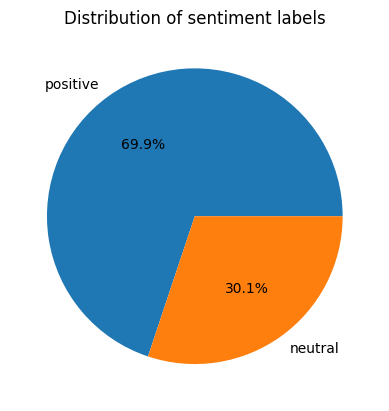

In [39]:
dfs=data['sentiment_labelnew'].value_counts(sort=True)  # top 10 manufactures in descending order

plt.pie(dfs,autopct='%.1f%%',labels=dfs.index,startangle=0) # Plotting pie chart by calling df4 variable defined before and assigning labels to piechart
      
        
 # display percent value in each pie wedge
pctdistance=0.8,  # The ratio between the center of each pie slice and the start of the text 
       
counterclock=True,   # Specify fractions direction, clockwise or counterclockwise
   # starting angle, default 0 degree
plt.title("Distribution of sentiment labels")  # Display title to piechart

plt.show()   #display piechart

In [40]:
data.head(20)

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified,sentiment,sentiment_label,sentiment_scores,polarity,sentiment_labelnew,senti,compound_score,sentimentlatest
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti,0.473750,neutral,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year,0.558333,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow,0.250000,neutral,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i,0.400000,neutral,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month,0.740000,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive
5,Home_and_Kitchen_5,3,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,0,"[I, WANTED, DIFFERENT, FLAVORS, BUT, THEY, ARE...","[I, WANTED, DIFFERENT, FLAVORS, BUT, THEY, ARE...","[i, want, differ, flavor, but, they, are, not]",i want differ flavor but they are not,0.000000,neutral,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.0387,neutral,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.0387,neutral
6,Home_and_Kitchen_5,5,CG,They are the perfect touch for me and the only...,0,"[They, are, the, perfect, touch, for, me, and,...","[They, perfect, touch, thing, I, wish, little,...","[they, perfect, touch, thing, i, wish, littl, ...",they perfect touch thing i wish littl space,0.328125,neutral,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.7506,positive,"{'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'comp...",0.7506,positive
7,Home_and_Kitchen_5,3,CG,These done fit well and look great. I love th...,0,"[These, done, fit, well, and, look, great, I, ...","[These, done, fit, well, look, great, I, love,...","[these, done, fit, well, look, great, i, love,...",these done fit well look great i love smooth e...,0.425000,neutral,"{'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'comp...",0.9169,positive,"{'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'comp...",0.9169,positive
8,Home_and_Kitchen_5,5,CG,"Great big numbers & easy to read, the only thi...",0,"[Great, big, numbers, easy, to, read, the, onl...","[Great, big, numbers, easy, read, thing, I, li...","[great, big, number, easi, read, thing, i, lik...",great big number easi read thing i like size,0.308333,neutral,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",0.7845,positive,

In [41]:
x = data['modified']
y = data['target']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2839,)
(1217,)
(2839,)
(1217,)


In [43]:
# Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Import the required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer class
vectorizer = TfidfVectorizer()

train_bow_matrix = vectorizer.fit_transform(train_data['modified'])
test_bow_matrix = vectorizer.transform(test_data['modified'])

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(train_bow_matrix, train_data['target'])

Y_pred_lr = lr_model.predict(test_bow_matrix)   


print(classification_report(test_data['target'], Y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       404
           1       0.94      0.93      0.93       408

    accuracy                           0.93       812
   macro avg       0.93      0.93      0.93       812
weighted avg       0.93      0.93      0.93       812



In [44]:
data

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified,sentiment,sentiment_label,sentiment_scores,polarity,sentiment_labelnew,senti,compound_score,sentimentlatest
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti,0.473750,neutral,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year,0.558333,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow,0.250000,neutral,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i,0.400000,neutral,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month,0.740000,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,Home_and_Kitchen_5,5,OR,I bought this vacuum cleaner 3 months ago and ...,1,"[I, bought, this, vacuum, cleaner, months, ago...","[I, bought, vacuum, cleaner, months, ago, abso...","[i, bought, vacuum, cleaner, month, ago, absol...",i bought vacuum cleaner month ago absolut love...,0.094367,neutral,"{'neg': 0.09, 'neu': 0.696, 'pos': 0.215, 'com...",0.9744,positive,"{'neg': 0.09, 'neu': 0.696, 'pos': 0.215, 'com...",0.9744,positive
4052,Home_and_Kitchen_5,5,CG,I have a whole set of containers and they look...,0,"[I, have, a, whole, set, of, containers, and, ...","[I, whole, set, containers, look, like, ones, ...","[i, whole, set, contain, look, like, one, i, u...",i whole set contain look like one i use i repl...,0.352370,neutral,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.9958,positive,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.9958,positive
4053,Home_and_Kitchen_5,5,OR,I purchased this after a friend recommended it...,1,"[I, purchased, this, after, a, friend, recomme...","[I, purchased, friend, recommended, I, power, ...","[i, purchas, friend, recommend, i, power, bake...",i purchas friend recommend i power baker i mer...,0.110140,neutral,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",0.9931,positive,"{'neg': 0.03, 'neu': 0.704, 'pos': 0.266, 'com...",0.9931,positive
4054,Home_and_Kitchen_5,5,CG,"Well, I've been curious about this set and am ...",0,"[Well, I, been, curious, about, this, set, and...","[Well, I, curious, set, pleased, The, dimensio...","[well, i, curiou, set, pleas, the, dimens, rig...",well i curiou set

In [45]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_lr),2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_lr),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_lr),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_lr),2)))

Accuracy Score : 0.93
Precision Score : 0.94
Recall Score : 0.93
F-Score : 0.93


[[379  25]
 [ 29 379]]


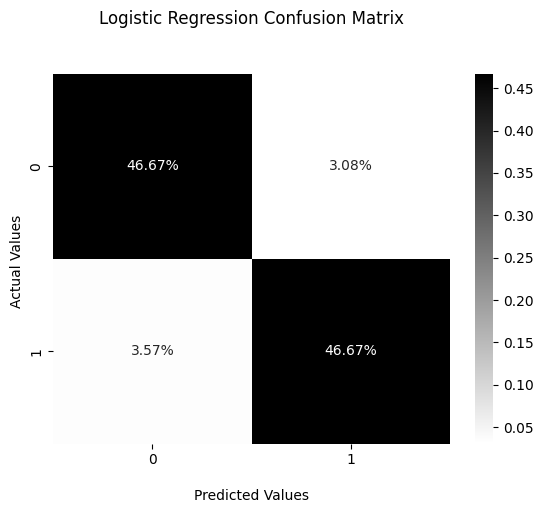

In [46]:
cf_matrix_lr = confusion_matrix(test_data['target'], Y_pred_lr)
print(cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(train_bow_matrix, train_data['target'])
# Evaluate model on test data
Y_pred_svc = svm.predict(test_bow_matrix)   


print(classification_report(test_data['target'], Y_pred_svc))


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       404
           1       0.92      0.97      0.95       408

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



In [48]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_svc),2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_svc),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_svc),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_svc),2)))

Accuracy Score : 0.94
Precision Score : 0.92
Recall Score : 0.97
F-Score : 0.95


[[370  34]
 [ 12 396]]


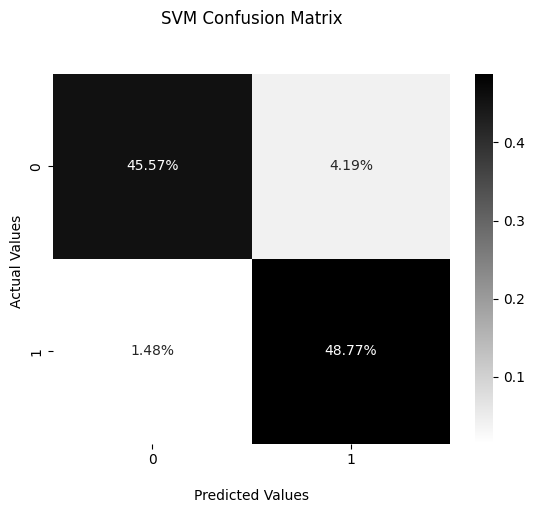

In [49]:
cf_matrix_svm = confusion_matrix(test_data['target'], Y_pred_svc)
print(cf_matrix_svm)

ax = sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, fmt='.2%', cmap='binary')

ax.set_title('SVM Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# instantiating the classifier 
randomforest_classifier = RandomForestClassifier(random_state=0)


# fit the model
randomforest_classifier.fit(train_bow_matrix, train_data['target'])
Y_pred_rf = randomforest_classifier.predict(test_bow_matrix)   


print(classification_report(test_data['target'], Y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82       404
           1       0.77      0.99      0.86       408

    accuracy                           0.84       812
   macro avg       0.88      0.84      0.84       812
weighted avg       0.88      0.84      0.84       812



In [51]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_rf),2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_rf),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_rf),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_rf),2)))

Accuracy Score : 0.84
Precision Score : 0.77
Recall Score : 0.99
F-Score : 0.86


[[280 124]
 [  3 405]]


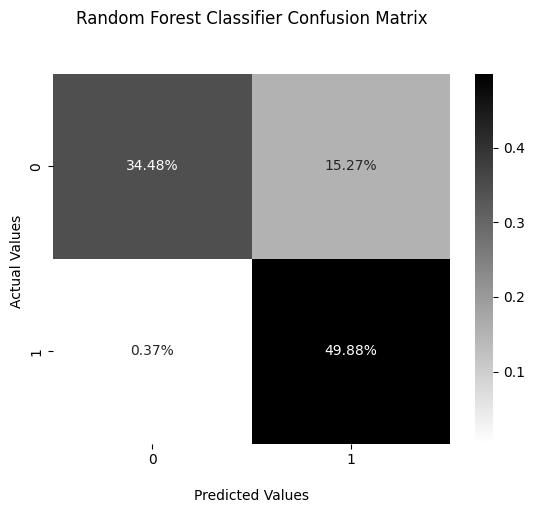

In [52]:
cf_matrix_rf = confusion_matrix(test_data['target'], Y_pred_rf)
print(cf_matrix_rf)

ax = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Random Forest Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [53]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('RFC', RandomForestClassifier())) 

In [54]:
# Voting Classifier with hard voting 
from sklearn.ensemble import VotingClassifier
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(train_bow_matrix, train_data['target']) 
Y_pred_hv = hard_voting.predict(test_bow_matrix)   


print(classification_report(test_data['target'], Y_pred_hv))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       404
           1       0.94      0.94      0.94       408

    accuracy                           0.94       812
   macro avg       0.94      0.94      0.94       812
weighted avg       0.94      0.94      0.94       812



In [55]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_hv), 2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_hv),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_hv),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_hv),2)))

Accuracy Score : 0.94
Precision Score : 0.94
Recall Score : 0.94
F-Score : 0.94


[[379  25]
 [ 25 383]]


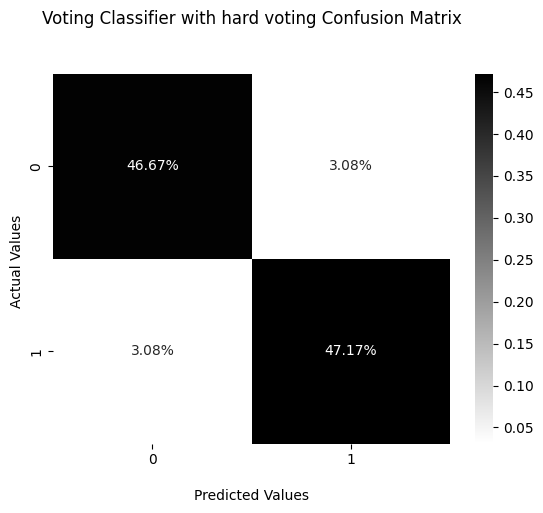

In [56]:
cf_matrix_hv = confusion_matrix(test_data['target'], Y_pred_hv)
print(cf_matrix_hv)

ax = sns.heatmap(cf_matrix_hv/np.sum(cf_matrix_hv), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Voting Classifier with hard voting Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(train_bow_matrix, train_data['target'])
Y_pred_sv = soft_voting.predict(test_bow_matrix) 

print(classification_report(test_data['target'], Y_pred_sv))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       404
           1       0.88      0.99      0.93       408

    accuracy                           0.93       812
   macro avg       0.93      0.93      0.93       812
weighted avg       0.93      0.93      0.93       812



In [58]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_sv),2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_sv),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_sv),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_sv),2)))

Accuracy Score : 0.93
Precision Score : 0.88
Recall Score : 0.99
F-Score : 0.93


[[350  54]
 [  5 403]]


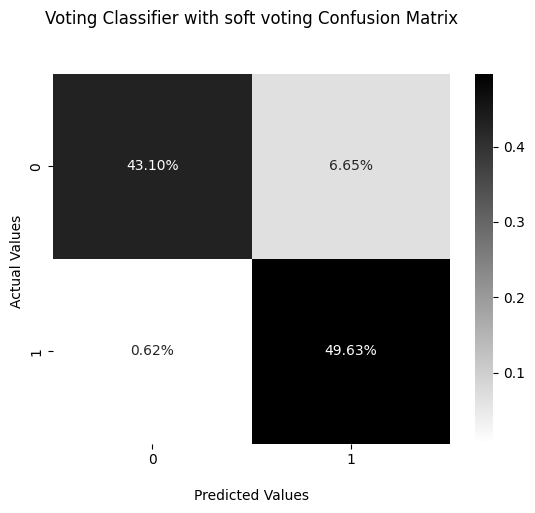

In [59]:
cf_matrix_sv = confusion_matrix(test_data['target'], Y_pred_sv)
print(cf_matrix_sv)

ax = sns.heatmap(cf_matrix_sv/np.sum(cf_matrix_sv), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Voting Classifier with soft voting Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [60]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_bow_matrix, train_data['target'])
Y_pred_dt = decision_tree.predict(test_bow_matrix)

print(classification_report(test_data['target'], Y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       404
           1       0.72      0.84      0.77       408

    accuracy                           0.75       812
   macro avg       0.76      0.75      0.75       812
weighted avg       0.76      0.75      0.75       812



In [61]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_dt),2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_dt),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_dt),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_dt),2)))

Accuracy Score : 0.75
Precision Score : 0.72
Recall Score : 0.84
F-Score : 0.77


[[270 134]
 [ 66 342]]


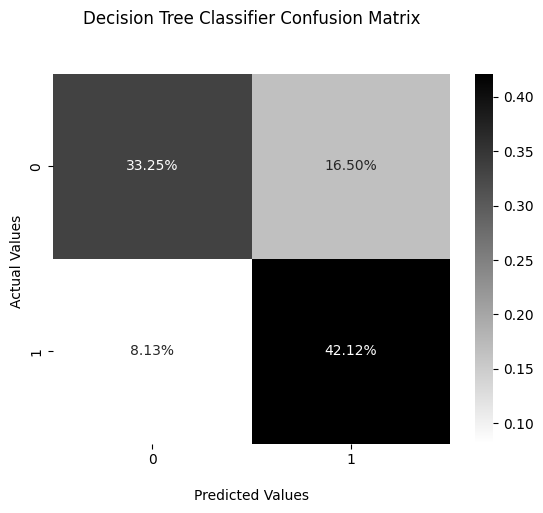

In [62]:
cf_matrix_dt = confusion_matrix(test_data['target'], Y_pred_dt)
print(cf_matrix_dt)

ax = sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Decision Tree Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# train the classifier
clf = MultinomialNB()
clf.fit(train_bow_matrix, train_data['target'])

# predict the classes of the test data
Y_pred_nb = clf.predict(test_bow_matrix)

print(classification_report(test_data['target'], Y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       404
           1       0.95      0.95      0.95       408

    accuracy                           0.95       812
   macro avg       0.95      0.95      0.95       812
weighted avg       0.95      0.95      0.95       812



In [64]:
print('Accuracy Score : ' + str(round(accuracy_score(test_data['target'],Y_pred_nb),2)))
print('Precision Score : ' + str(round(precision_score(test_data['target'],Y_pred_nb),2)))
print('Recall Score : ' + str(round(recall_score(test_data['target'],Y_pred_nb),2)))
print('F-Score : ' + str(round(f1_score(test_data['target'],Y_pred_nb),2)))

Accuracy Score : 0.95
Precision Score : 0.95
Recall Score : 0.95
F-Score : 0.95


[[385  19]
 [ 19 389]]


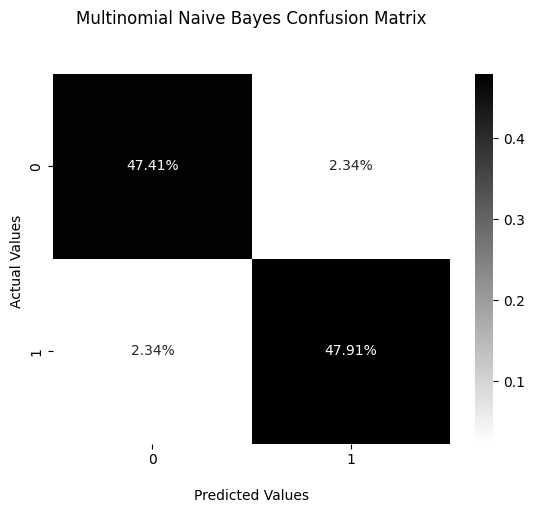

In [65]:
cf_matrix_nb = confusion_matrix(test_data['target'], Y_pred_nb)
print(cf_matrix_nb)

ax = sns.heatmap(cf_matrix_nb/np.sum(cf_matrix_nb), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Multinomial Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [66]:
#dictionary with all metrics
accuracies = {"Logistic Regression":accuracy_score(test_data['target'],Y_pred_lr), "SVC":accuracy_score(test_data['target'],Y_pred_svc), "Random Forest":accuracy_score(test_data['target'],Y_pred_rf), "Voting Classifier by hard voting":accuracy_score(test_data['target'],Y_pred_hv), "Voting Classifier by soft voting":accuracy_score(test_data['target'],Y_pred_sv), 'Decision Tree Classifier': accuracy_score(test_data['target'],Y_pred_dt), 'Multinomial Naive Bayes':accuracy_score(test_data['target'],Y_pred_nb) }
print("The best accuracy  score has the model: ", max(accuracies, key=accuracies.get))

precisions = {"Logistic Regression":precision_score(test_data['target'],Y_pred_lr), "SVC":precision_score(test_data['target'],Y_pred_svc), "Random Forest":precision_score(test_data['target'],Y_pred_rf), "Voting Classifier by hard voting":precision_score(test_data['target'],Y_pred_hv), "Voting Classifier by soft voting":precision_score(test_data['target'],Y_pred_sv), 'Decision Tree Classifier': precision_score(test_data['target'],Y_pred_dt), 'Multinomial Naive Bayes':accuracy_score(test_data['target'],Y_pred_nb) }
print("The best precision score has the model: ", max(precisions, key=precisions.get))

recalls = {"Logistic Regression":recall_score(test_data['target'],Y_pred_lr), "SVC":recall_score(test_data['target'],Y_pred_svc), "Random Forest":recall_score(test_data['target'],Y_pred_rf), "Voting Classifier by hard voting":recall_score(test_data['target'],Y_pred_hv), "Voting Classifier by soft voting":recall_score(test_data['target'],Y_pred_sv), 'Decision Tree Classifier': recall_score(test_data['target'],Y_pred_dt), 'Multinomial Naive Bayes':recall_score(test_data['target'],Y_pred_nb) }
print("The best recall score has the model: ", max(recalls, key=recalls.get))

f1_scores = {"Logistic Regression":f1_score(test_data['target'],Y_pred_lr), "SVC":f1_score(test_data['target'],Y_pred_svc), "Random Forest":f1_score(test_data['target'],Y_pred_rf), "Voting Classifier by hard voting":f1_score(test_data['target'],Y_pred_hv), "Voting Classifier by soft voting":f1_score(test_data['target'],Y_pred_sv), 'Decision Tree Classifier': f1_score(test_data['target'],Y_pred_dt), 'Multinomial Naive Bayes':f1_score(test_data['target'],Y_pred_nb) }
print("The best F1 score has the model: ", max(f1_scores, key=f1_scores.get))




The best accuracy  score has the model:  Multinomial Naive Bayes
The best precision score has the model:  Multinomial Naive Bayes
The best recall score has the model:  Random Forest
The best F1 score has the model:  Multinomial Naive Bayes


In [67]:
#pivot table with accuracy, precision and recall metrics results
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(recalls.values())

df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                              Model  Accuracy  Precision    Recall  F1_Score
0               Logistic Regression  0.933498   0.938119  0.928922  0.928922
1                               SVC  0.943350   0.920930  0.970588  0.970588
2                     Random Forest  0.843596   0.765595  0.992647  0.992647
3  Voting Classifier by hard voting  0.938424   0.938725  0.938725  0.938725
4  Voting Classifier by soft voting  0.927340   0.881838  0.987745  0.987745
5          Decision Tree Classifier  0.753695   0.718487  0.838235  0.838235
6           Multinomial Naive Bayes  0.953202   0.953202  0.953431  0.953431


In [68]:
#preparation for plotting the metrics
accuracy_models_keys    = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())

df_accuracy             = pd.DataFrame({"Model":accuracy_models_keys,
                                        "Accuracy":accuracy_models_values})

precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
df_precision            = pd.DataFrame({"Model": precision_models_keys,
                                        "Precision": precision_models_values})

recall_models_keys      = list(recalls.keys())
recall_models_values    = list(recalls.values())
df_recall               = pd.DataFrame({"Model": recall_models_keys,
                                        "Recall": recall_models_values})

f1_score_models_keys    = list(f1_scores.keys())
f1_score_models_values  = list(f1_scores.values())
df_f1_score             = pd.DataFrame({"Model": f1_score_models_keys,
                                        "Recall": f1_score_models_values})

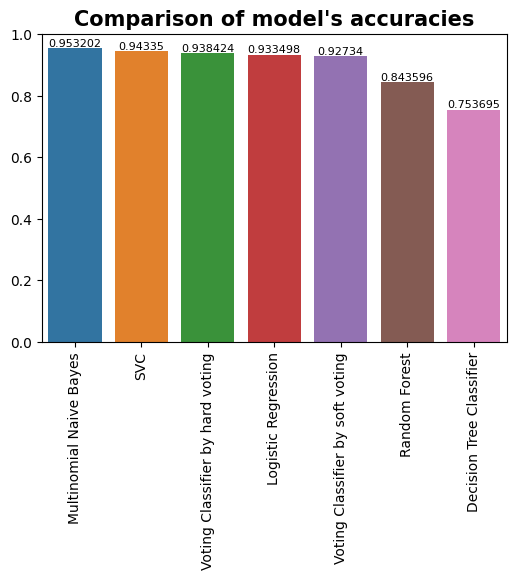

In [69]:
#model's accuracy evaluation in barplot

plt.figure(figsize = (6,4))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), order=df_accuracy.sort_values('Accuracy', ascending=False).Model)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', fontname = 'Helvetica', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 8)
plt.xticks(rotation=90)


plt.show()

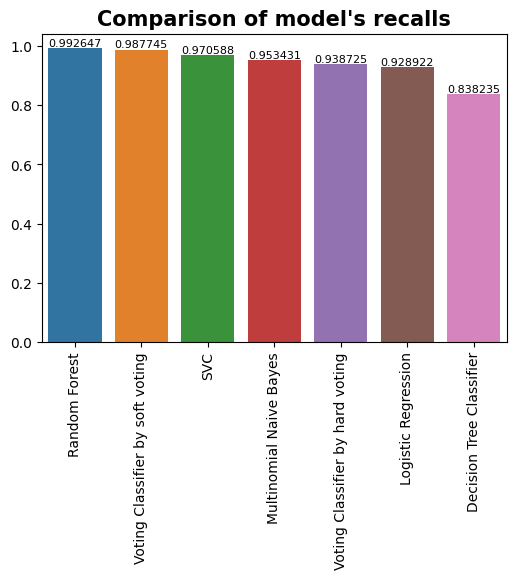

In [70]:
#model's recall evaluation in barplot

plt.figure(figsize = (6,4))
ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), order=df_recall.sort_values('Recall', ascending=False).Model)
plt.title(label = "Comparison of model's recalls", fontsize = 15, fontweight = 'bold', fontname = 'Helvetica', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 8)
plt.xticks(rotation=90)

plt.show()

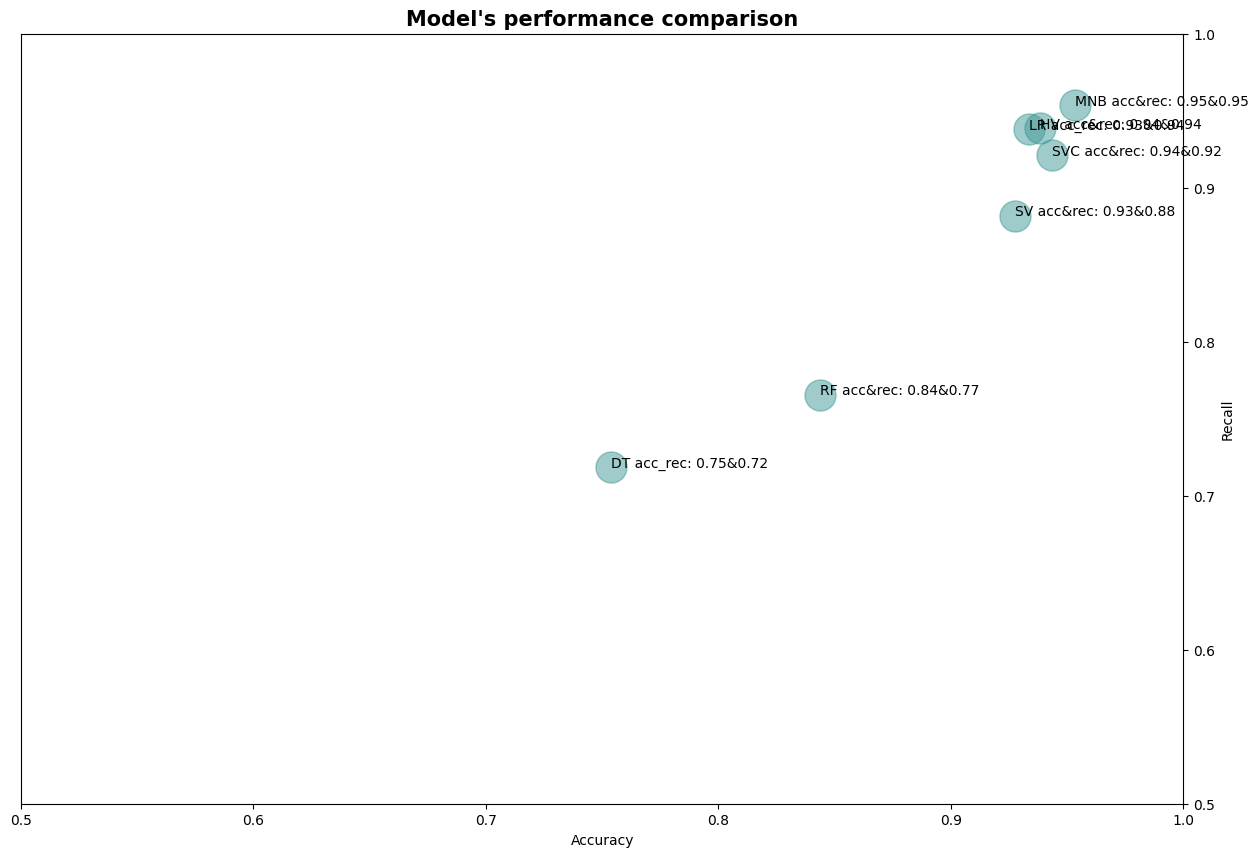

In [71]:
#Plotting both accuracies and recalls
labels = ["LR acc_rec: " + str(round(accuracy_score(test_data['target'],Y_pred_lr),2)) + "&" + str(round(precision_score(test_data['target'],Y_pred_lr),2)),
          "SVC acc&rec: " + str(round(accuracy_score(test_data['target'],Y_pred_svc),2)) + "&" + str(round(precision_score(test_data['target'],Y_pred_svc),2)),
          "RF acc&rec: " + str(round(accuracy_score(test_data['target'],Y_pred_rf),2))  + "&" + str(round(precision_score(test_data['target'],Y_pred_rf),2)),
          "HV acc&rec: " + str(round(accuracy_score(test_data['target'],Y_pred_hv),2))  + "&" + str(round(precision_score(test_data['target'],Y_pred_hv),2)),
          "SV acc&rec: " + str(round(accuracy_score(test_data['target'],Y_pred_sv),2))  + "&" + str(round(precision_score(test_data['target'],Y_pred_sv),2)),
          'DT acc_rec: ' + str(round(accuracy_score(test_data['target'],Y_pred_dt),2))  + "&" + str(round(precision_score(test_data['target'],Y_pred_dt),2)),
          "MNB acc&rec: " + str(round(accuracy_score(test_data['target'],Y_pred_nb),2))  + "&" + str(round(precision_score(test_data['target'],Y_pred_nb),2)),]
x      = [accuracy_score(test_data['target'],Y_pred_lr), accuracy_score(test_data['target'],Y_pred_svc), accuracy_score(test_data['target'],Y_pred_rf), accuracy_score(test_data['target'],Y_pred_hv), accuracy_score(test_data['target'],Y_pred_sv), accuracy_score(test_data['target'],Y_pred_dt), accuracy_score(test_data['target'],Y_pred_nb)]
y      = [precision_score(test_data['target'],Y_pred_lr), precision_score(test_data['target'],Y_pred_svc), precision_score(test_data['target'],Y_pred_rf), precision_score(test_data['target'],Y_pred_hv), precision_score(test_data['target'],Y_pred_sv), precision_score(test_data['target'],Y_pred_dt), precision_score(test_data['target'],Y_pred_nb)]

figure = plt.figure(figsize = (15,10))
ax     = figure.add_subplot(111)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.title(label="Model's performance comparison", fontsize = 15, fontweight = 'bold', fontname = 'Helvetica', ha = 'center')
plt.xlabel('Accuracy')
plt.ylabel('Recall')
plt.scatter(x, y, alpha = 0.5, c='#409996', s=500)
for i in range(len(labels)):
    plt.annotate(labels[i] , (x[i] , y[i]))
plt.show()

In [73]:
data.head()

,category,rating,label,text_,target,tokenized,stopwords_removed,porter_stemmed,modified,sentiment,sentiment_label,sentiment_scores,polarity,sentiment_labelnew,senti,compound_score,sentimentlatest
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0,"[Love, this, Well, made, sturdy, and, very, co...","[Love, Well, made, sturdy, comfortable, I, lov...","[love, well, made, sturdi, comfort, i, love, v...",love well made sturdi comfort i love veri pretti,0.473750,neutral,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive,"{'neg': 0.0, 'neu': 0.235, 'pos': 0.765, 'comp...",0.9186,positive
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0,"[love, it, a, great, upgrade, from, the, origi...","[love, great, upgrade, original, I, mine, coup...","[love, great, upgrad, origin, i, mine, coupl, ...",love great upgrad origin i mine coupl year,0.558333,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.8519,positive
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0,"[This, pillow, saved, my, back, I, love, the, ...","[This, pillow, saved, back, I, love, look, fee...","[thi, pillow, save, back, i, love, look, feel,...",thi pillow save back i love look feel pillow,0.250000,neutral,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.8126,positive
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0,"[Missing, information, on, how, to, use, it, b...","[Missing, information, use, great, product, pr...","[miss, inform, use, great, product, price, i]",miss inform use great product price i,0.400000,neutral,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive,"{'neg': 0.165, 'neu': 0.412, 'pos': 0.423, 'co...",0.5423,positive
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0,"[Very, nice, set, Good, quality, We, have, had...","[Very, nice, set, Good, quality, We, set, two,...","[veri, nice, set, good, qualiti, we, set, two,...",veri nice set good qualiti we set two month,0.740000,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive,"{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...",0.6908,positive


In [75]:
import pickle
PIK = "model.pkl"

data = ["lr_model", "randomforest_classifier", "svm", "hard_voting", "soft_voting", "decision_tree", "clf"]
with open(PIK, "wb") as f:
    pickle.dump(data, f)
with open(PIK, "rb") as f:
    print(pickle.load(f))

['lr_model', 'randomforest_classifier', 'svm', 'hard_voting', 'soft_voting', 'decision_tree', 'clf']
